# ligistic regression

现在应该考虑列向量，Tensorflow对数据的形状非常挑剔，在numpy中，正常的一维ndarray已经被表示为列向量， 

如果我重新塑造$\mathbb{R}^n$ 为 $\mathbb{R}^{n\times1}$，它不再是列向量了，而是是1列的矩阵,那使用scipy会有麻烦。

*所以我们应该把TensorFlow的数据视为特殊情况。 我们继续使用numpy的惯例。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns            #简便画图的包，实际上是封装了matplotlib,是matplotlib的补充，不是代替
plt.style.use('fivethirtyeight')
import matplotlib.pyplot as plt
# import tensorflow as tf
from sklearn.metrics import classification_report#这个包是评价报告

# 准备数据

In [2]:
data = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
data.head()#看前五行

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


### seaborn是对matplotlib的高级封装，简便画图，提供了大量参数调整图形
### 而Pandas没有太多参数调整图形；
### 两者共同点是：都是基于matplotlib的封装；
seaborn的API链接：
http://seaborn.pydata.org/api.html#style-frontend

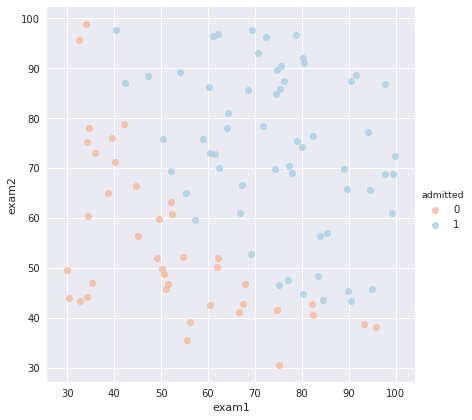

In [4]:
sns.set(context="notebook", style="darkgrid", palette=sns.color_palette("RdBu", 2))

sns.lmplot('exam1', 'exam2', hue='admitted', data=data, 
           size=6, 
           fit_reg=False, 
           scatter_kws={"s": 50}
          )
plt.show()#看下数据的样子

In [5]:
def get_X(df):#读取特征
#     """
#     use concat to add intersect feature to avoid side effect
#     not efficient for big dataset though
#     """
    ones = pd.DataFrame({'ones': np.ones(len(df))})#ones是m行1列的dataframe
    data = pd.concat([ones, df], axis=1)  # 合并数据，根据列合并
    return data.iloc[:, :-1].as_matrix()  # 这个操作返回 ndarray,不是矩阵


def get_y(df):#读取标签
#     '''assume the last column is the target'''
    return np.array(df.iloc[:, -1])#df.iloc[:, -1]是指df的最后一列


def normalize_feature(df):
#     """Applies function along input axis(default 0) of DataFrame."""
    return df.apply(lambda column: (column - column.mean()) / column.std())#特征缩放

In [6]:
X = get_X(data)
print(X.shape)

y = get_y(data)
print(y.shape)

(100, 3)
(100,)


In [30]:
#X
#print(y)


## 逻辑斯蒂函数

分布函数： $F\left( x \right)=P(X\leq x)=\frac{1}{1+{{e}^{-\frac{\left(x-\mu\right)}{\gamma}}}}$ 

密度函数： $f\left( x \right)=\frac{{e}^{-\frac{x-\mu}{\gamma}}}{\gamma \left(-\frac{x-\mu}{\gamma}\right)^2} $

其图形如下：![avatar](./logistic.jpg)



## 二项逻辑斯蒂回归模型是如下条件概率分布

$P(Y = 1| x) = \frac{e^{(w*x+b)}}{1 + e^{(x*x+b)}}$

$P(Y = 0| x) = \frac{1}{1 + e^{(x*x+b)}}$

## sigmoid函数
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： \\[g\left( z \right)=\frac{1}{1+{{e}^{-z}}}\\] 
 $h_\theta(x)=g(\theta_0+\theta_1x_1+...+\theta_nx_n)$

合起来，我们得到逻辑回归模型的假设函数： 
	\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 
  
   $h_\theta(x)$的作用是，对于给定的输入变量，根据选择的参数计算输出变量=1的可能性，即
   
   $h_\theta(x)=P(y=1|x;\theta)$
    
 代码实现：

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### 可视化sigmod函数

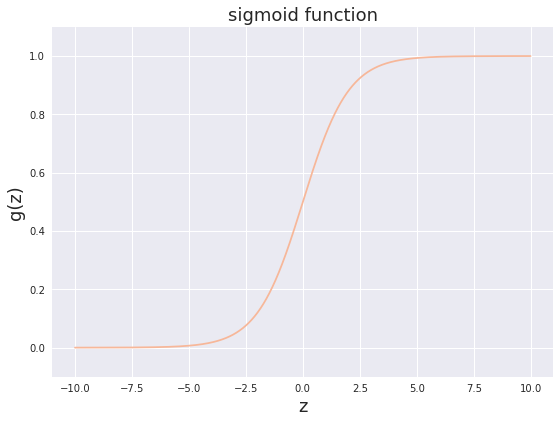

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.arange(-10, 10, step=0.01),
        sigmoid(np.arange(-10, 10, step=0.01)))
ax.set_ylim((-0.1,1.1))
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmoid function', fontsize=18)
plt.show()

# cost function(代价函数)
>* $max(\ell(\theta)) = min(-\ell(\theta))$  
>* choose $-\ell(\theta)$ as the cost function

当将${{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}$带入代价函数

$J(\theta) = -\frac{1}{m}\sum\limits_{i=1}^{m}{\frac{1}{2}\left(h_\theta(x^{(i)})-y^{(i)}\right)^{2}} $

得到一个非凸函数，其图形如下：

其图形如下：![avatar](./non-convex.png)

所以，我们重新定义现象回归的代价函数为:

$J(\theta) = \frac{1}{m}\sum\limits_{i=1}^{m}{Cost\left(h_\theta(x^{(i)})-y^{(i)}\right)} $

其中:![avatar](./cost.png)

将构建的$Cost(h_\theta(x),y)$简化如下：

$Cost(h_\theta(x),y) = -y\log(h_\theta(x))-(1-y)\log(1-h_\theta(x))$

带入原代价函数得到：



$$\begin{align}
  & J\left( \theta  \right)=-\frac{1}{m}\sum\limits_{i=1}^{m}{[{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)+\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
 & =\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
\end{align}$$

我们的目标转化为求上述代价函数最小值；

In [10]:
theta=np.zeros(3) # X(m*n) so theta is n*1
theta

array([0., 0., 0.])

### 代价函数代码实现：

In [11]:
def cost(theta, X, y):
    ''' cost fn is -l(theta) for you to minimize'''
    return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta)))

# X @ theta与X.dot(theta)等价

In [12]:
cost(theta, X, y)

0.6931471805599453

# gradient descent(梯度下降)
* 这是批量梯度下降（batch gradient descent）  
* 转化为向量化计算： $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [15]:
def gradient(theta, X, y):
#     '''just 1 batch gradient'''
    return (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y)

In [16]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

# 拟合参数
> * 这里我使用 [`scipy.optimize.minimize`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) 去寻找参数  

In [17]:
import scipy.optimize as opt

In [18]:
res = opt.minimize(fun=cost, x0=theta, args=(X, y), method='Newton-CG', jac=gradient)

In [19]:
print(res)

     fun: 0.20354223455402295
     jac: array([ 0.00013006, -0.0025161 , -0.00193377])
 message: 'Optimization terminated successfully.'
    nfev: 71
    nhev: 0
     nit: 26
    njev: 220
  status: 0
 success: True
       x: array([-24.61918277,   0.20189713,   0.19708283])


# 用训练集预测和验证

In [43]:
def predict(x, theta):
    prob = sigmoid(x @ theta)
    return (prob >= 0.5).astype(int)

In [44]:
final_theta = res.x
y_pred = predict(X, final_theta)

print(classification_report(y, y_pred))

ValueError: Mix type of y not allowed, got types {'continuous', 'binary'}

In [45]:
classification_report

<function sklearn.metrics.classification.classification_report>

# 寻找决策边界
http://stats.stackexchange.com/questions/93569/why-is-logistic-regression-a-linear-classifier
> $X \times \theta = 0$  (this is the line)

In [46]:
print(res.x) # this is final theta

[-24.61918277   0.20189713   0.19708283]


In [47]:
print(res)

     fun: 0.20354223455402295
     jac: array([ 0.00013006, -0.0025161 , -0.00193377])
 message: 'Optimization terminated successfully.'
    nfev: 71
    nhev: 0
     nit: 26
    njev: 220
  status: 0
 success: True
       x: array([-24.61918277,   0.20189713,   0.19708283])


In [48]:
coef = -(res.x / res.x[2])  # find the equation
print(coef)

x = np.arange(130, step=0.1)
y = coef[0] + coef[1]*x

[124.91794811  -1.02442779  -1.        ]


In [49]:
data.describe()  # find the range of x and y

,f00,f01,f02,f03,f04,f05,f06,f10,f11,f12,...,f30,f31,f32,f33,f40,f41,f42,f50,f51,f60
count,118.0,118.000000,118.000000,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,118.000000,118.000000,...,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,1.180000e+02,118.000000,1.180000e+02
mean,1.0,0.183102,0.301370,0.142350,1.710985e-01,0.115710,1.257256e-01,0.054779,-0.025472,0.015483,...,5.983333e-02,-0.005251,9.432094e-03,-0.001705,1.225384e-01,0.011812,1.893340e-02,5.196507e-02,-0.000703,7.837118e-02
std,0.0,0.519743,0.284536,0.326134,2.815658e-01,0.299092,2.964416e-01,0.496654,0.224075,0.150143,...,2.746459e-01,0.096738,5.455787e-02,0.037443,2.092709e-01,0.072274,3.430092e-02,2.148098e-01,0.058271,1.938621e-01
min,1.0,-0.769740,0.000026,-0.456071,6.855856e-10,-0.270222,1.795116e-14,-0.830070,-0.484096,-0.483743,...,-5.719317e-01,-0.296854,-1.592528e-01,-0.113448,1.612020e-09,-0.246068,2.577297e-10,-3.940702e-01,-0.203971,6.472253e-14
25%,1.0,-0.254385,0.061086,-0.016492,3.741593e-03,-0.001072,2.298277e-04,-0.372120,-0.178209,-0.042980,...,-5.155632e-02,-0.029360,-3.659760e-03,-0.005749,1.869975e-03,-0.001926,1.258285e-04,-7.147973e-03,-0.006381,8.086369e-05
50%,1.0,0.213455,0.252195,0.009734,6.360222e-02,0.000444,1.604015e-02,-0.006336,-0.016521,-0.000039,...,-2.544062e-07,-0.000512,-1.473547e-07,-0.000005,2.736163e-02,0.000205,3.387050e-03,-1.021440e-11,-0.000004,4.527344e-03
75%,1.0,0.646562,0.464189,0.270310,2.155453e-01,0.113020,1.001215e-01,0.478970,0.100795,0.079510,...,1.099616e-01,0.015050,1.370560e-02,0.001024,1.520801e-01,0.019183,2.090875e-02,2.526861e-02,0.002104,5.932959e-02
max,1.0,1.108900,1.229659,1.363569,1.512062e+00,1.676725,1.859321e+00,1.070900,0.568307,0.505577,...,1.228137e+00,0.369805,2.451845e-01,0.183548,1.315212e+00,0.304409,2.018260e-01,1.408460e+00,0.250577,1.508320e+00


> you know the intercept would be around 125 for both x and y

## 解决过拟合问题
两个办法：

1.减少特征个数；

手动减少；

模型选择算法；

2.正则化

保留所哟特征，但是减少量级

# 3- 正则化逻辑回归

In [50]:
sns.set(context="notebook", style="ticks", font_scale=1.5)

sns.lmplot('exam1', 'exam2', hue='admitted', data=data, 
           size=6, 
           fit_reg=False, 
           scatter_kws={"s": 25}
          )

plt.plot(x, y, 'blue')
plt.xlim(0, 130)
plt.ylim(0, 130)
plt.title('Decision Boundary')
plt.show()

KeyError: "['admitted' 'exam1' 'exam2'] not in index"

In [51]:
df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
df.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


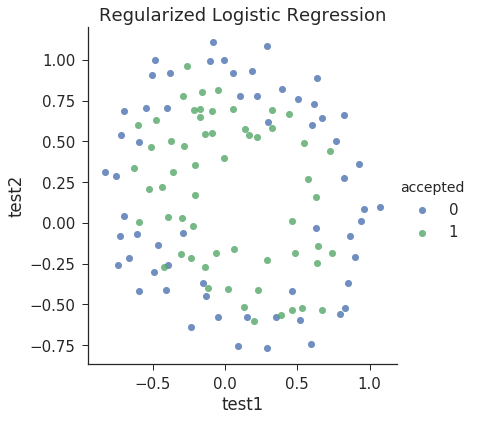

In [52]:
sns.set(context="notebook", style="ticks", font_scale=1.5)

sns.lmplot('test1', 'test2', hue='accepted', data=df, 
           size=6, 
           fit_reg=False, 
           scatter_kws={"s": 50}
          )

plt.title('Regularized Logistic Regression')
plt.show()

# feature mapping（特征映射）

polynomial expansion

```
for i in 0..i
  for p in 0..i:
    output x^(i-p) * y^p
```
<img style="float: left;" src="../img/mapped_feature.png">

In [53]:
def feature_mapping(x, y, power, as_ndarray=False):
#     """return mapped features as ndarray or dataframe"""
    # data = {}
    # # inclusive
    # for i in np.arange(power + 1):
    #     for p in np.arange(i + 1):
    #         data["f{}{}".format(i - p, p)] = np.power(x, i - p) * np.power(y, p)

    data = {"f{}{}".format(i - p, p): np.power(x, i - p) * np.power(y, p)
                for i in np.arange(power + 1)
                for p in np.arange(i + 1)
            }

    if as_ndarray:
        return pd.DataFrame(data).as_matrix()
    else:
        return pd.DataFrame(data)

In [54]:
x1 = np.array(df.test1)
x2 = np.array(df.test2)


In [55]:
data = feature_mapping(x1, x2, power=6)
print(data.shape)
data.head()

(118, 28)


,f00,f01,f02,f03,f04,f05,f06,f10,f11,f12,...,f30,f31,f32,f33,f40,f41,f42,f50,f51,f60
0,1.0,0.69956,0.489384,0.342354,0.239497,0.167542,0.117206,0.051267,0.035864,0.025089,...,0.000135,0.000094,0.000066,0.000046,0.000007,0.000005,0.000003,3.541519e-07,2.477505e-07,1.815630e-08
1,1.0,0.68494,0.469143,0.321335,0.220095,0.150752,0.103256,-0.092742,-0.063523,-0.043509,...,-0.000798,-0.000546,-0.000374,-0.000256,0.000074,0.000051,0.000035,-6.860919e-06,-4.699318e-06,6.362953e-07
2,1.0,0.69225,0.479210,0.331733,0.229642,0.158970,0.110047,-0.213710,-0.147941,-0.102412,...,-0.009761,-0.006757,-0.004677,-0.003238,0.002086,0.001444,0.001000,-4.457837e-04,-3.085938e-04,9.526844e-05
3,1.0,0.50219,0.252195,0.126650,0.063602,0.031940,0.016040,-0.375000,-0.188321,-0.094573,...,-0.052734,-0.026483,-0.013299,-0.006679,0.019775,0.009931,0.004987,-7.415771e-03,-3.724126e-03,2.780914e-03
4,1.0,0.46564,0.216821,0.100960,0.047011,0.021890,0.010193,-0.513250,-0.238990,-0.111283,...,-0.135203,-0.062956,-0.029315,-0.013650,0.069393,0.032312,0.015046,-3.561597e-02,-1.658422e-02,1.827990e-02


In [56]:
data.describe()

,f00,f01,f02,f03,f04,f05,f06,f10,f11,f12,...,f30,f31,f32,f33,f40,f41,f42,f50,f51,f60
count,118.0,118.000000,118.000000,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,118.000000,118.000000,...,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,1.180000e+02,118.000000,1.180000e+02
mean,1.0,0.183102,0.301370,0.142350,1.710985e-01,0.115710,1.257256e-01,0.054779,-0.025472,0.015483,...,5.983333e-02,-0.005251,9.432094e-03,-0.001705,1.225384e-01,0.011812,1.893340e-02,5.196507e-02,-0.000703,7.837118e-02
std,0.0,0.519743,0.284536,0.326134,2.815658e-01,0.299092,2.964416e-01,0.496654,0.224075,0.150143,...,2.746459e-01,0.096738,5.455787e-02,0.037443,2.092709e-01,0.072274,3.430092e-02,2.148098e-01,0.058271,1.938621e-01
min,1.0,-0.769740,0.000026,-0.456071,6.855856e-10,-0.270222,1.795116e-14,-0.830070,-0.484096,-0.483743,...,-5.719317e-01,-0.296854,-1.592528e-01,-0.113448,1.612020e-09,-0.246068,2.577297e-10,-3.940702e-01,-0.203971,6.472253e-14
25%,1.0,-0.254385,0.061086,-0.016492,3.741593e-03,-0.001072,2.298277e-04,-0.372120,-0.178209,-0.042980,...,-5.155632e-02,-0.029360,-3.659760e-03,-0.005749,1.869975e-03,-0.001926,1.258285e-04,-7.147973e-03,-0.006381,8.086369e-05
50%,1.0,0.213455,0.252195,0.009734,6.360222e-02,0.000444,1.604015e-02,-0.006336,-0.016521,-0.000039,...,-2.544062e-07,-0.000512,-1.473547e-07,-0.000005,2.736163e-02,0.000205,3.387050e-03,-1.021440e-11,-0.000004,4.527344e-03
75%,1.0,0.646562,0.464189,0.270310,2.155453e-01,0.113020,1.001215e-01,0.478970,0.100795,0.079510,...,1.099616e-01,0.015050,1.370560e-02,0.001024,1.520801e-01,0.019183,2.090875e-02,2.526861e-02,0.002104,5.932959e-02
max,1.0,1.108900,1.229659,1.363569,1.512062e+00,1.676725,1.859321e+00,1.070900,0.568307,0.505577,...,1.228137e+00,0.369805,2.451845e-01,0.183548,1.315212e+00,0.304409,2.018260e-01,1.408460e+00,0.250577,1.508320e+00


# regularized cost（正则化代价函数）
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

In [57]:
theta = np.zeros(data.shape[1])
X = feature_mapping(x1, x2, power=6, as_ndarray=True)
print(X.shape)

y = get_y(df)
print(y.shape)

(118, 28)
(118,)


In [58]:
def regularized_cost(theta, X, y, l=1):
#     '''you don't penalize theta_0'''
    theta_j1_to_n = theta[1:]
    regularized_term = (l / (2 * len(X))) * np.power(theta_j1_to_n, 2).sum()

    return cost(theta, X, y) + regularized_term
#正则化代价函数

In [59]:
regularized_cost(theta, X, y, l=1)

0.6931471805599454

this is the same as the not regularized cost because we init theta as zeros...
因为我们设置theta为0，所以这个正则化代价函数与代价函数的值相同

# regularized gradient(正则化梯度)
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\left( \frac{1}{m}\sum\limits_{i=1}^{m}{\left( {{h}_{\theta }}\left( {{x}^{\left( i \right)}} \right)-{{y}^{\left( i \right)}} \right)} \right)+\frac{\lambda }{m}{{\theta }_{j}}\text{ }\text{             for  j}\ge \text{1}$$

In [60]:
def regularized_gradient(theta, X, y, l=1):
#     '''still, leave theta_0 alone'''
    theta_j1_to_n = theta[1:]
    regularized_theta = (l / len(X)) * theta_j1_to_n

    # by doing this, no offset is on theta_0
    regularized_term = np.concatenate([np.array([0]), regularized_theta])

    return gradient(theta, X, y) + regularized_term

In [61]:
regularized_gradient(theta, X, y)

array([8.47457627e-03, 7.77711864e-05, 3.76648474e-02, 2.34764889e-02,
       3.93028171e-02, 3.10079849e-02, 3.87936363e-02, 1.87880932e-02,
       1.15013308e-02, 8.19244468e-03, 3.09593720e-03, 4.47629067e-03,
       1.37646175e-03, 5.03446395e-02, 7.32393391e-03, 1.28600503e-02,
       5.83822078e-03, 7.26504316e-03, 1.83559872e-02, 2.23923907e-03,
       3.38643902e-03, 4.08503006e-04, 3.93486234e-02, 4.32983232e-03,
       6.31570797e-03, 1.99707467e-02, 1.09740238e-03, 3.10312442e-02])

# 拟合参数

In [62]:
import scipy.optimize as opt

In [63]:
print('init cost = {}'.format(regularized_cost(theta, X, y)))

res = opt.minimize(fun=regularized_cost, x0=theta, args=(X, y), method='Newton-CG', jac=regularized_gradient)
res

init cost = 0.6931471805599454


     fun: 0.5290027297127441
     jac: array([-8.82693160e-08, -1.52730915e-07, -1.63164551e-07, -4.74947837e-08,
       -6.74574778e-08, -4.50340865e-08, -4.30013281e-08, -4.44247894e-08,
       -1.08141771e-07, -2.35098543e-08,  8.08834844e-09, -4.88752068e-09,
        1.31887849e-09, -1.85394447e-07, -9.28177377e-09,  2.48185017e-08,
        7.56647439e-09, -9.68424031e-09, -3.66727462e-08,  2.65311787e-09,
        2.46658562e-09, -1.59103725e-09, -2.58210179e-08,  1.24519551e-10,
        1.56730117e-09, -2.22385127e-08, -8.43576357e-10, -4.15388905e-08])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 90
  status: 0
 success: True
       x: array([ 1.27273923,  1.18108734, -1.43166536, -0.17512963, -1.19281592,
       -0.45635663, -0.92465202,  0.62527125, -0.91742459, -0.35723919,
       -0.27470573, -0.29537764, -0.14388684, -2.01996166, -0.36553378,
       -0.61555375, -0.27778404, -0.32737936,  0.12400578, -0.05098866,
       -0.0

# 预测

In [64]:
final_theta = res.x
y_pred = predict(X, final_theta)

print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.90      0.75      0.82        60
          1       0.78      0.91      0.84        58

avg / total       0.84      0.83      0.83       118



# 使用不同的 $\lambda$ （这个是常数）
# 画出决策边界
* 我们找到所有满足 $X\times \theta = 0$ 的x
* instead of solving polynomial equation, just create a coridate x,y grid that is dense enough, and find all those $X\times \theta$ that is close enough to 0, then plot them

In [72]:
def draw_boundary(power, l):
#     """
#     power: polynomial power for mapped feature
#     l: lambda constant
#     """
    density = 1000
    threshhold = 2 * 10**-3

    final_theta = feature_mapped_logistic_regression(power, l)
    x, y = find_decision_boundary(density, power, final_theta, threshhold)

    df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
    sns.lmplot('test1', 'test2', hue='accepted', data=df, size=6, fit_reg=False, scatter_kws={"s": 100})

    plt.scatter(x, y, c='R', s=10)
    plt.title('Decision boundary')
    plt.show()

In [73]:
def feature_mapped_logistic_regression(power, l):
#     """for drawing purpose only.. not a well generealize logistic regression
#     power: int
#         raise x1, x2 to polynomial power
#     l: int
#         lambda constant for regularization term
#     """
    df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
    x1 = np.array(df.test1)
    x2 = np.array(df.test2)
    y = get_y(df)

    X = feature_mapping(x1, x2, power, as_ndarray=True)
    theta = np.zeros(X.shape[1])

    res = opt.minimize(fun=regularized_cost,
                       x0=theta,
                       args=(X, y, l),
                       method='TNC',
                       jac=regularized_gradient)
    final_theta = res.x

    return final_theta

In [74]:
def find_decision_boundary(density, power, theta, threshhold):
    t1 = np.linspace(-1, 1.5, density)
    t2 = np.linspace(-1, 1.5, density)

    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    mapped_cord = feature_mapping(x_cord, y_cord, power)  # this is a dataframe

    inner_product = mapped_cord.as_matrix() @ theta

    decision = mapped_cord[np.abs(inner_product) < threshhold]

    return decision.f10, decision.f01
#寻找决策边界函数

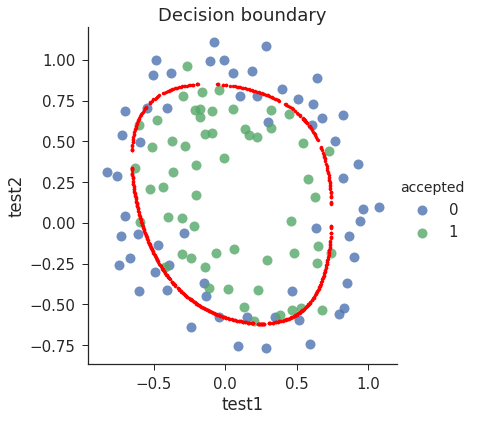

In [75]:
draw_boundary(power=6, l=1)#lambda=1

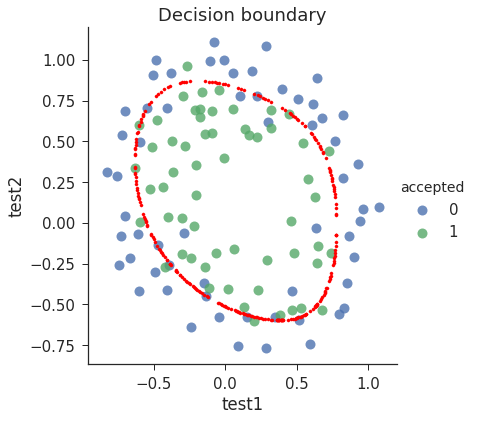

In [76]:
draw_boundary(power=6, l=0.1)  # no regularization, over fitting，#lambda=0,没有正则化，过拟合了

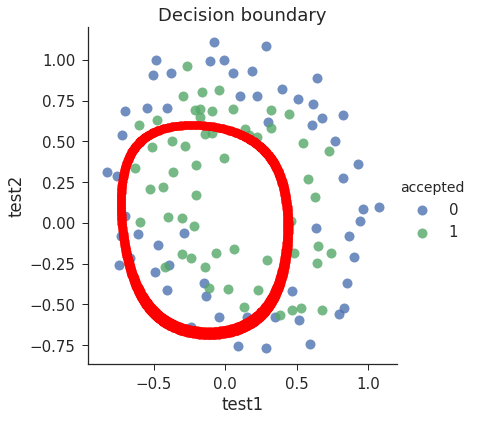

In [77]:
draw_boundary(power=6, l=100)  # underfitting，#lambda=100,欠拟合